

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: в этом году он открывает 100 новых скважин по добыче газа. Однако в целях оптимизации расходов и для потенциального повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы потенциально сильнейшим образом влияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста по построению моделей машинного обучения.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать здесь.

Признаки:

        Well — идентификатор скважины;
        Por — пористость скважины (%);
        Perm — проницаемость скважины;
        AI — акустический импеданс (кгм);
        Brittle — коэффициент хрупкости скважины (%);
        TOC — общий органический углерод (%);
        VR — коэффициент отражения витринита (%);
        Prod — добыча газа в сутки (млн. кубических футов).

Ваша задача — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.


In [75]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [76]:
data = pd.read_csv('data/unconv.csv')
data

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
...,...,...,...,...,...,...,...,...
195,196,11.95,3.13,2.97,67.18,0.80,2.06,3847.571003
196,197,17.99,9.87,3.38,44.32,0.98,2.08,5601.227131
197,198,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363
198,199,15.55,4.48,2.48,58.25,1.89,2.35,5087.592149


<AxesSubplot: >

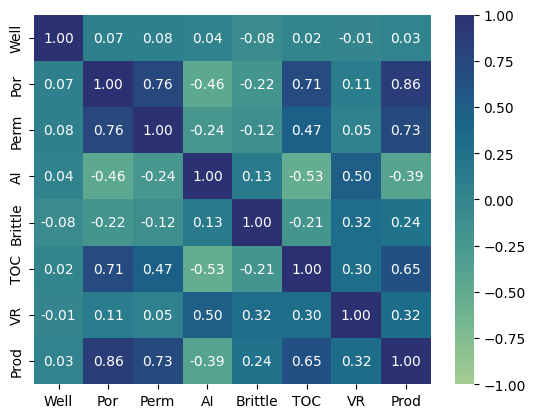

In [77]:
cm = data.corr()
sns.heatmap(cm, annot=True, fmt='.2f', vmax=1, vmin=-1, cmap="crest")

In [78]:
m = cm.values
np.linalg.matrix_rank(m)

8

In [79]:
np.linalg.det(m)

0.0007299388072652095

In [80]:
X = data.drop(columns='Prod')
y = data['Prod']

In [81]:
A = np.column_stack((np.ones(200), X.values))
b = y.values
w = np.linalg.inv(A.T@A)@A.T@b
print(w)

[-1.23230803e+03  5.07003631e-02  2.30179140e+02  1.16239006e+02
 -3.65202301e+02  2.49943700e+01 -7.84009294e+01  7.85259815e+02]


In [82]:
v1 = np.array([106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
pred = w[1:]@v1 + w[0]

In [83]:
4748.315024 - pred

25.25097029260087

In [84]:
from sklearn import metrics

In [85]:
v = X.values@w[1:] + w[0]
mape = metrics.mean_absolute_percentage_error(b, v) * 100
mape

3.6279468451336507

In [86]:
pd.Series(w[1:], index=data.columns[:-1])

Well         0.050700
Por        230.179140
Perm       116.239006
AI        -365.202301
Brittle     24.994370
TOC        -78.400929
VR         785.259815
dtype: float64

In [87]:
X = data.drop(columns=['Well', 'Perm', 'TOC', 'Prod'])
y = data['Prod']

In [88]:
A = np.column_stack((np.ones(200), X.values))
b = y.values
w = np.linalg.inv(A.T@A)@A.T@b
print(pd.Series(w[1:], index=X.columns))
w

Por        293.036246
AI        -200.030912
Brittle     27.640982
VR         517.402726
dtype: float64


array([-1835.44646069,   293.03624565,  -200.03091206,    27.64098209,
         517.40272597])

In [89]:
v = X.values@w[1:] + w[0]
mape = metrics.mean_absolute_percentage_error(b, v) * 100
mape

4.044138420436113

In [90]:
10.4 + 8*1 + 0.5*4 + 3*1 + 0.4*16

29.799999999999997

In [91]:
x = np.array([1, 3 ,-2, 9])
y = np.array([3, 7, -5, 21])

m = np.column_stack((np.ones(4), x, x*x))
w = np.linalg.inv(m.T@m)@m.T@y
w

array([ 0.11446013,  2.46095638, -0.01608801])

In [92]:
o = np.array([1, 1, 1, 1, 1])
x1 = np.array([5, 9, 4, 3, 5])
x2 = np.array([15, 18, 18, 19, 19])
x3 = np.array([7, 6, 7, 7, 7])
y = np.array([24, 22, 35, 33, 36])

m = np.array([o, x1, x2, x3]).T
alpha = 1
E = np.eye(4)

In [93]:
m

array([[ 1,  5, 15,  7],
       [ 1,  9, 18,  6],
       [ 1,  4, 18,  7],
       [ 1,  3, 19,  7],
       [ 1,  5, 19,  7]])

In [94]:
w = np.linalg.inv(m.T@m + alpha*E)@m.T@y
np.round(w, 2)

array([-0.09, -1.71,  1.91,  0.73])

In [95]:
X = data.drop(columns=['Well', 'Perm', 'TOC', 'Prod'])
y = data['Prod']

Сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов PolynomialFeatures из библиотеки sklearn. Параметр include_bias установите в значение False.
1. Сколько факторов у вас получилось после генерации полиномиальных признаков?

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=3, include_bias=False)
lin_reg = linear_model.LinearRegression()

In [97]:
A = X.values
A_poly = poly.fit_transform(A)
pd.DataFrame(A_poly).shape

(200, 34)

In [98]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    lin_reg, 
    A_poly, 
    y, 
    scoring='neg_mean_absolute_percentage_error', 
    cv=5, 
    return_train_score=True)
print(f"MAPE on train: {-cv_results['train_score'].mean()* 100}")
print(f"MAPE on validation: {-cv_results['test_score'].mean()* 100}")

MAPE on train: 1.7732404749850912
MAPE on validation: 2.6808754501405665


In [99]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
lasso = Lasso(alpha=5, max_iter=10000)
lasso.fit(A_poly, y)
cv_results = cross_validate(
    lasso, 
    A_poly, 
    y, 
    scoring='neg_mean_absolute_percentage_error', 
    cv=5, 
    return_train_score=True)
print(f"MAPE on train: {-cv_results['train_score'].mean()* 100}")
print(f"MAPE on validation: {-cv_results['test_score'].mean()* 100}")

/home/egor/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.324e+06, tolerance: 1.958e+04
  model = cd_fast.enet_coordinate_descent(
/home/egor/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.087e+06, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
/home/egor/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+

MAPE on train: 1.895728885919324
MAPE on validation: 2.3767724735735674


/home/egor/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.156e+05, tolerance: 1.582e+04
  model = cd_fast.enet_coordinate_descent(
/home/egor/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.197e+05, tolerance: 1.474e+04
  model = cd_fast.enet_coordinate_descent(


In [100]:

ridge = Ridge(alpha=1)
ridge.fit(A_poly, y)
cv_results = cross_validate(
    ridge, 
    A_poly, 
    y, 
    scoring='neg_mean_absolute_percentage_error', 
    cv=5, 
    return_train_score=True)
print(f"MAPE on train: {-cv_results['train_score'].mean()* 100}")
print(f"MAPE on validation: {-cv_results['test_score'].mean()* 100}")

MAPE on train: 1.8248556259307511
MAPE on validation: 2.5093252183801966


In [102]:
a = np.array([[1,3,5], 
              [4,-4,9],
              [13,7,12]])
a

array([[ 1,  3,  5],
       [ 4, -4,  9],
       [13,  7, 12]])

In [104]:
eig_values, eig_vectors = np.linalg.eig(a)
print('Собственные числа: \n', np.round(eig_values))
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [20. -4. -7.]
Собственные векторы: 
 [[-0.29813912 -0.73141292  0.25078429]
 [-0.38491044  0.59044076 -0.95097448]
 [-0.87347411  0.34119621  0.18098281]]


In [105]:
m = np.array([[1,9,4], 
              [9,4,7],
              [4,7,12]])

g = m.T@m
eig_values, eig_vectors = np.linalg.eig(g)
print('Собственные числа: \n', np.round(eig_values))
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [391.  46.  16.]
Собственные векторы: 
 [[-0.41955589 -0.7323045  -0.5363795 ]
 [-0.55709648  0.67425896 -0.48478693]
 [-0.71667034 -0.09541992  0.69085358]]


In [106]:
g

array([[ 98,  73, 115],
       [ 73, 146, 148],
       [115, 148, 209]])

In [108]:
C = np.array([[1, 0.9922], [0.9922, 1]])
eig_values, eig_vectors = np.linalg.eig(C)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [1.9922 0.0078]
Собственные векторы: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [118]:
x1 = np.array([1, 2, 1, 1]).T
x2 = np.array([70,130,65,60]).T
x1_cent = x1 - x1.mean()
x2_cent = x2 - x2.mean()
x1_st = x1_cent/np.linalg.norm(x1)
x2_st = x2_cent/np.linalg.norm(x2)
NF = eig_vectors[0][0]*x1_st + eig_vectors[1][0]*x2_st
NF_new = (NF - NF.mean()) / np.linalg.norm(NF)
np.round(NF_new, 2)

array([-0.24,  0.86, -0.29, -0.33])